In [ ]:
# pip install opencv-python
# pip install tessaract

# Link para descargar el ejecutable de tesseract: https://github.com/UB-Mannheim/tesseract/wiki

## Imports

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()


'c:\\Users\\laura\\OneDrive - Universidad Politécnica de Madrid\\ABC_upm\\VSC\\HMDA_Information_retrieval\\Assignment2'

In [2]:
import sys
sys.path.insert(1, "c:\\Users\\laura\\OneDrive - Universidad Politécnica de Madrid\\ABC_upm\\VSC\\HMDA_Information_retrieval")# importar las funciones del archivo functions.py

from Assignment2.functions import *

# 1. Load Images

In [3]:
# DataFrame: car_id, path

cars_df = pd.DataFrame(columns=['car_id', 'path'])
cars_df = get_images_paths("..\data\Formula_one_cars\Alphatauri", cars_df)
cars_df = get_images_paths("..\data\Formula_one_cars\Ferrari", cars_df)
cars_df = get_images_paths("..\data\Formula_one_cars\Mclaren", cars_df)
cars_df = get_images_paths("..\data\Formula_one_cars\Mercedes", cars_df)
cars_df = get_images_paths("..\data\Formula_one_cars\Racingpoint", cars_df)
cars_df = get_images_paths("..\data\Formula_one_cars\Redbull", cars_df)
cars_df = get_images_paths("..\data\Formula_one_cars\Renault", cars_df)
cars_df = get_images_paths("..\data\Formula_one_cars\Williams", cars_df)
print(cars_df.shape)
cars_df.tail()

(240, 2)


,car_id,path
235,235,..\data\Formula_one_cars\Williams\00000449.jpg
236,236,..\data\Formula_one_cars\Williams\00000459.jpg
237,237,..\data\Formula_one_cars\Williams\00000499.jpg
238,238,..\data\Formula_one_cars\Williams\00000514.jpg
239,239,..\data\Formula_one_cars\Williams\00000524.jpg


In [4]:
# save df as csv
cars_df.to_csv('..\data\Formula_one_cars\cars.csv', index=False)

# 2. Plot query image: _my_image_

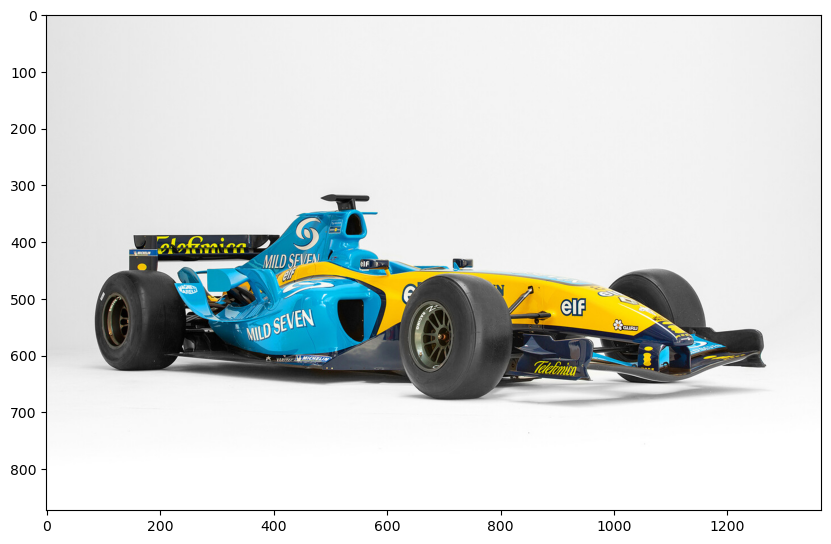

In [5]:
plt.figure(figsize=(10, 10))
my_img_path = cars_df['path'][210]
my_img = Image.open(my_img_path)
plt.imshow(my_img)

# 3. Get some descriptors: Text (OCR - pytesseract) and Color (Histogram - cv2)

In [6]:
text = ocr(my_img_path)
print('words found in my_img: ',text)

words found in my_img:  ['mildsevene', 'wie', 'elf', 'stam']


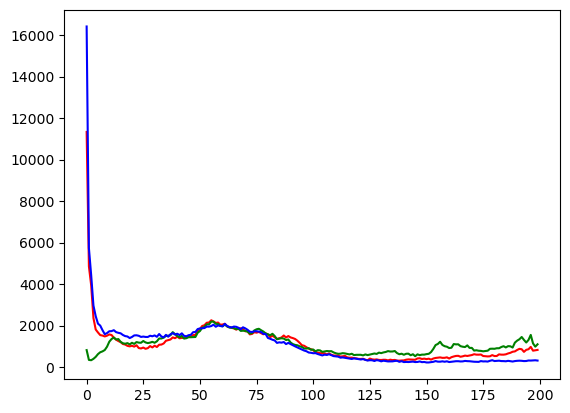

In [7]:
my_image = cv2.imread(my_img_path)
hist = histogram(my_img_path, th=200, plot=True)

## 3. Example: Compare 2 images using the descriptors 

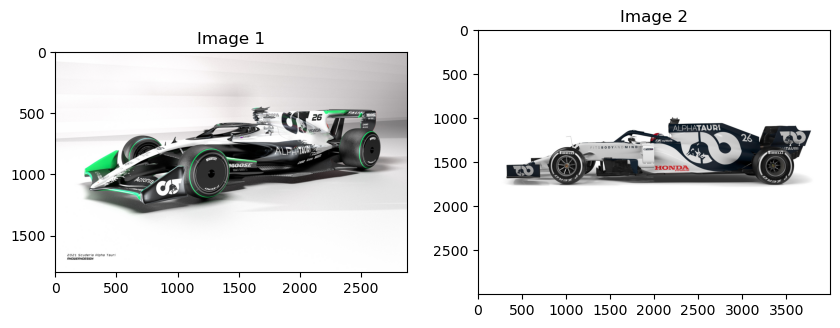

In [8]:
img_path1 = cars_df['path'][10]
img_path2= cars_df['path'][11]

# show both images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(img_path1))
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(Image.open(img_path2))
plt.title('Image 2')
plt.show()

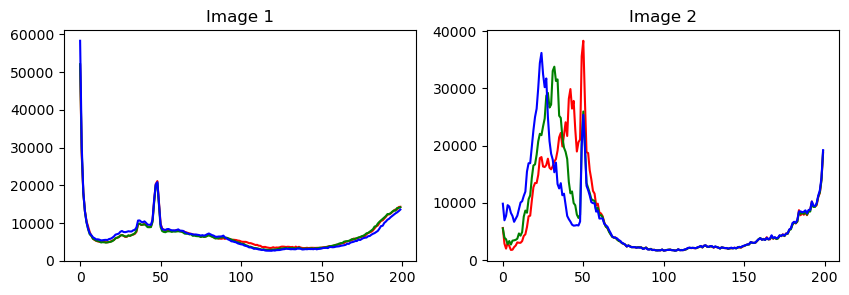

In [9]:
# Calculate bothe histograms
hist1 = histogram(img_path1, th=200, plot=False)
hist2 = histogram(img_path2, th=200, plot=False)

# plot both histograms
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(hist1[0], color='r')
plt.plot(hist1[1], color='g')
plt.plot(hist1[2], color='b')
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.plot(hist2[0], color='r')
plt.plot(hist2[1], color='g')
plt.plot(hist2[2], color='b')
plt.title('Image 2')
plt.show()

In [10]:
# Calculate the correlation between the histograms
hist_comparative = compare_histograms(hist1, hist2, print_results=True)

correlation:  0.30260937496899276
intersection:  970456.3333333334


In [11]:
# Calculate words in the images
text1 = ocr(img_path1)
text2 = ocr(img_path2)
print('words found in img1: ', text1)
print('words found in img2: ', text2)

words found in img1:  ['moose', 'zales', 'auc', 'acroms', 'casio', 'pelv', 'reyours', 'herd', 'rdavurt', 'anit', 'aed', 'fs,', 'zee', 'aciorys', 'east,', '2021scuderiaalphatauri', 'anowerndesign']
words found in img2:  ['alphatauri', ',myworld', 'ftsbodyandmindir,', 'atauri', 'fireco', 'irelli', 'honda', 'ey,', 'hybrid']


In [12]:
text_comparative = compare_text(text1, text2)
text_comparative

(2, 0.11764705882352941)

In [13]:
text_comparative = compare_text(['lau', 'fer','alpha'], ['laurel', 'fer', 'al'], print_results=True)
text_comparative

(3, 1.0)

# 3. Perform OCR and Color Histogram on the image set

Los dos descriptores usados son: la correlación media de los histogramas RGB y el conteo de palabras

In [14]:
values_df, results_df = perform_comparation(my_img_path, cars_df, n1=0.5, n2=0.5)

In [15]:
results_df.head()

,car_id,hist_correlation,text_similarity
0,..\data\Formula_one_cars\Alphatauri\00000018.jpg,0.468313,0.0
1,..\data\Formula_one_cars\Alphatauri\00000022.jpg,0.506647,0.0
2,..\data\Formula_one_cars\Alphatauri\00000024.jpg,0.214794,0.0
3,..\data\Formula_one_cars\Alphatauri\00000031.jpg,0.192660,0.0
4,..\data\Formula_one_cars\Alphatauri\00000061.jpg,0.229899,0.0


In [16]:
values_df.head()

,car_id,similarity_value
0,..\data\Formula_one_cars\Alphatauri\00000018.jpg,0.234157
1,..\data\Formula_one_cars\Alphatauri\00000022.jpg,0.253323
2,..\data\Formula_one_cars\Alphatauri\00000024.jpg,0.107397
3,..\data\Formula_one_cars\Alphatauri\00000031.jpg,0.096330
4,..\data\Formula_one_cars\Alphatauri\00000061.jpg,0.114949


In [17]:
# sort df by similarity
values_df = values_df.sort_values(by='similarity_value', ascending=False)
values_df

,car_id,similarity_value
211,..\data\Formula_one_cars\Renault\1366_200000.jpg,0.852149
209,..\data\Formula_one_cars\Renault\01366_2000.jpg,0.470753
203,..\data\Formula_one_cars\Renault\00000416.jpg,0.461000
181,..\data\Formula_one_cars\Redbull\00000461.jpg,0.457456
158,..\data\Formula_one_cars\Redbull\00000154.jpg,0.449803
...,...,...
67,..\data\Formula_one_cars\Mclaren\00000206.jpg,-0.085633
92,..\data\Formula_one_cars\Mclaren\00000441.jpg,-0.087357
115,..\data\Formula_one_cars\Mercedes\00000290.jpg,-0.112087
108,..\data\Formula_one_cars\Mercedes\00000180.jpg,-0.118686


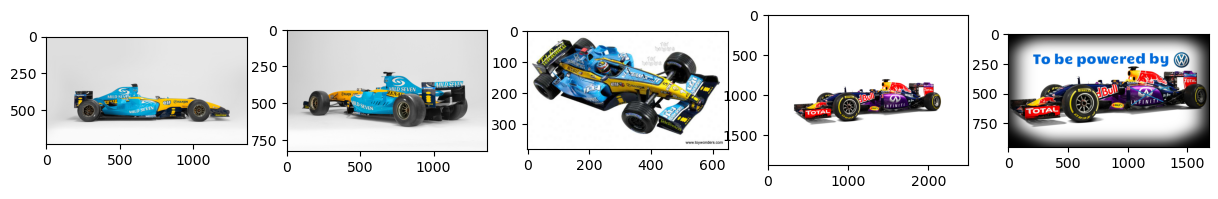

In [18]:
# show first 5 images

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(Image.open(values_df['car_id'].iloc[i]))
    
plt.show()

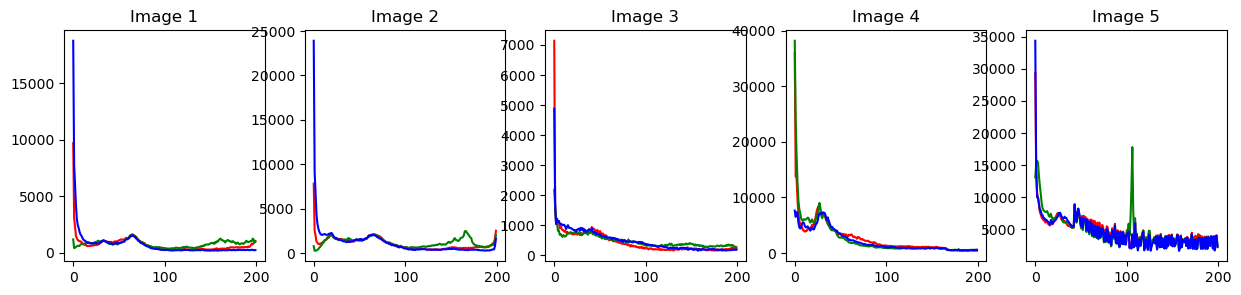

In [19]:
# print the histograms for the first 5 images
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    hist = histogram(values_df['car_id'].iloc[i], th=200, plot=False)
    plt.plot(hist[0], color='r')
    plt.plot(hist[1], color='g')
    plt.plot(hist[2], color='b')
    plt.title('Image ' + str(i+1))
plt.show()

In [20]:
# print the words in the first 5 images
for i in range(5):
    text = ocr(values_df['car_id'].iloc[i])
    print('words in image ', i+1, ': ', text)
    print('-----------------------------------')
    
# print the similarity values for the first 5 images
values_df.head()


words in image  1 :  ['mildsev', 'elf,', 'tee', 'mil', 'geve', 'seeeccnmirm']
-----------------------------------
words in image  2 :  ['are', 'yraaeeaet', 'sevem', 'wuldseven']
-----------------------------------
words in image  3 :  ['wee', 'sex', 'wnwwtoywonderscom']
-----------------------------------
words in image  4 :  ['bafanitigd', 'pia', 'otal', 'taa', 'aon', 'wiewo,0y', 'cede', 'ges', 'ney', 'pam', 'infinit', 'total']
-----------------------------------
words in image  5 :  ['tobe', 'powered', 'faite', 'wire', 'hite,gaut', 'lwinit', 'total']
-----------------------------------


,car_id,similarity_value
211,..\data\Formula_one_cars\Renault\1366_200000.jpg,0.852149
209,..\data\Formula_one_cars\Renault\01366_2000.jpg,0.470753
203,..\data\Formula_one_cars\Renault\00000416.jpg,0.461000
181,..\data\Formula_one_cars\Redbull\00000461.jpg,0.457456
158,..\data\Formula_one_cars\Redbull\00000154.jpg,0.449803
